# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Чтобы целиком отображался датафрейм
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В таблице много пропусков, придётся думать над их заменой (если замена возможна)

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В таблице имеются странные строки (например, квартиры с нулевым количеством комнат)

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

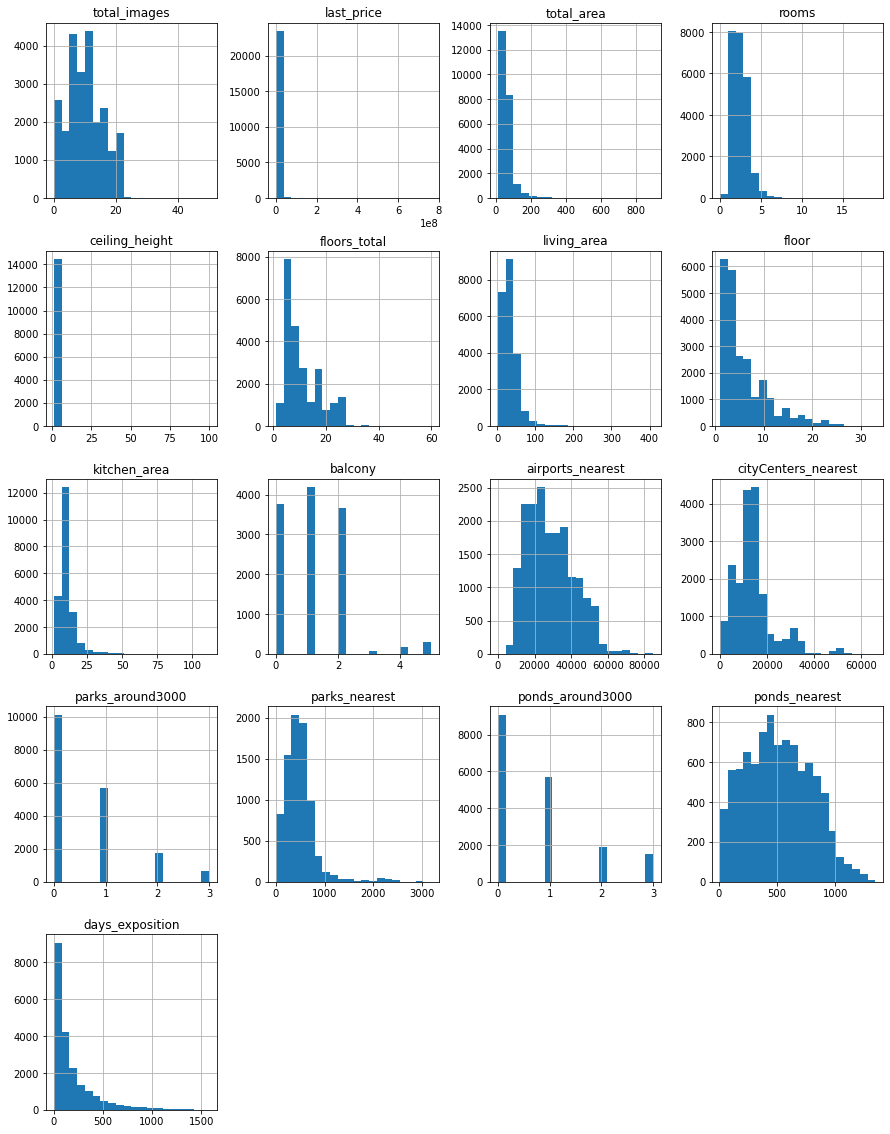

In [5]:
data.hist(figsize=(15, 20), bins=20) # общая гистограмма для всех столбцов

По гистограммам и дескрайбу видны как аномально большие значения в высоте потолков, количестве этажей, цене квартиры, так и аномально маленькие в количестве комнат, высоте потолков, общей, жилой и кухонной площади. Поиск неявных дубликатов осуществлен в блоке предобработки даннных при более детальном исследовании каждого из столбцов.

In [6]:
# столбцы с пропущенными значениями
data.loc[:, data.isna().sum() > 0].columns

Index(['ceiling_height', 'floors_total', 'living_area', 'is_apartment',
       'kitchen_area', 'balcony', 'locality_name', 'airports_nearest',
       'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition'],
      dtype='object')

Загрузили и посмотрели на данные, можно и к предобработке приступить

## Предобработка данных

In [7]:
data.isna().sum() # количество проущенных значений в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Сколько тут всего...

Изменим формат данных в  столбце first_day_exposition к более удобному для анализа

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


### Начнём избавляться от пропусков

#### Проверим столбец 'balcony'

In [9]:
data.loc[data['balcony'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,NaN,False,False,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0


Скорее всего, если продавец не указал число балконов, то в его квартире их нет, а значит такие пропуски правильнее всего заменить на 0

In [10]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum() # проверим на наличие пропусков

0

#### Проверим столбец 'ceiling_height'

Как вариант, можно заменить пропуски средним значением или медианным, но для этого нужно избивиться от аномальных значений

<AxesSubplot:xlabel='ceiling_height'>

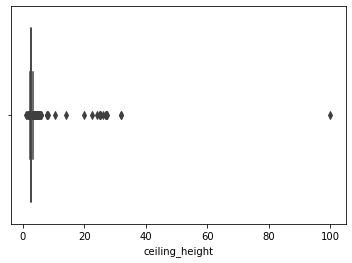

In [11]:
sns.boxplot(x=data['ceiling_height'])

Потолки в 25+ метров для обычных квартир явно звучат как нечто абсурдное... Логично предположить, что на самом деле это вещественные значения (например, 25 метров - это 2.5 метра).

In [12]:
data['ceiling_height'].sort_values(ascending=False)

22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
         ...  
23687      NaN
23690      NaN
23692      NaN
23695      NaN
23696      NaN
Name: ceiling_height, Length: 23699, dtype: float64

<AxesSubplot:>

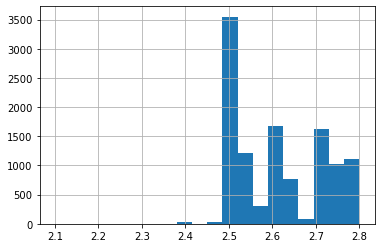

In [13]:
data['ceiling_height'].hist(bins=20, range=(2.1, 2.8))

Потолки ниже двух метров тоже слишком странное явление.

Ключевым документом, который регулирует высоту потолков, является СНиП 31-01-2003.

Минимальная высота в квартирах и жилых домах 
- 2,7 м. Высота потолков установлена для регионов с теплым климатом. Но при этом цифра не «застыла» в законодательстве. Прописывается, что в каждом случае должны проводиться сложные расчеты с целью уточнения параметров воздухообмена. 
- 2,5 м. Минимальная высота потолков для жилых объектов, расположенных в других климатических зонах (т.е. та самая средняя полоса России). 
- 2,1 м. Минимальное значение параметра, установленная для проходных помещений (к примеру, для коридоров). 
- Для помещений, находящихся на мансарде, ограничения не предусмотрены. Т.е. здесь значение может быть и 2,40, и 2,45, и 2,30, и 2,35, и 2,20.

Источник: http://expert-home.net/standartnaya-vysota-potolkov-v-kvartire/?ysclid=l7g9zn975w183790561

Думаю самым разумным решением будет поделить высоту всех потолков более 21 метра включительно на 10, тогда высота уложится в регламент и будет соответствовать действительности, (хотя, будь это возможным, я бы попробовал задать вопрос тем, кто формировал эти данные и уточнил бы корректность своего решения), а в квартирах с потолками между 10 и 21 и меньше 2.1 метров заменить высоту на медиану или среднее.

In [14]:
data.loc[data['ceiling_height'] >= 21, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 21, 'ceiling_height'] / 10
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [15]:
# Срез данных для нахождения медианы
ceiling = data.query('(ceiling_height < 10) or (ceiling_height >= 2.1)')

<AxesSubplot:xlabel='ceiling_height'>

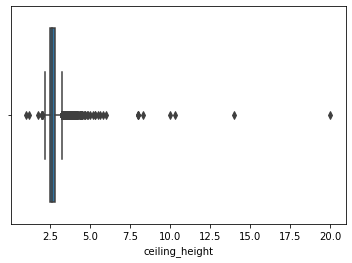

In [16]:
sns.boxplot(x=ceiling['ceiling_height'])

In [17]:
ceiling['ceiling_height'].unique()

array([ 2.7 ,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,  2.9 ,
        2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

Для рассчёта средней высоты потолков возьмём нормальные значения (между первым и третьим квартилем)

In [18]:
ceiling['ceiling_height'].describe()

count    14504.000000
mean         2.730849
std          0.350473
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

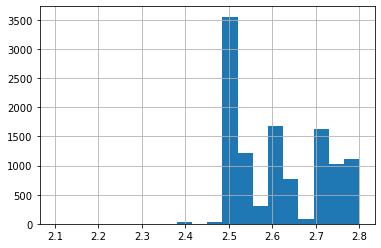

In [19]:
ceiling['ceiling_height'].hist(bins=20, range=(2.1, 2.8))

In [20]:
print(f'Среднее: {ceiling["ceiling_height"].mean()}\nМедиана: {ceiling["ceiling_height"].median()}')

Среднее: 2.73084873138439
Медиана: 2.65


Глядя на гистограмму, кажется, что заменить пропуски и неверные значения на медиану будет более верным решением

In [21]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

In [22]:
data.loc[(2.1 > data['ceiling_height']) |
         ((data['ceiling_height'] > 10) & (data['ceiling_height'] <= 21)), 
         'ceiling_height'] = 2.65
print(data['ceiling_height'].isna().sum(), 'пропусков')
data['ceiling_height'].unique()

0 пропусков


array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,  3.16,
        3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,  2.79,
        2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,  2.4 ,
        3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,  3.57,
        2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,  3.75,
        2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,  4.8 ,
        4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,  8.  ,
        3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,  3.22,
        3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,  8.3 ,
        2.98,  2.86,

#### Проверим столбец 'is_apartament'

In [23]:
data[data['is_apartment'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,NaN,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,NaN,False,False,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Вот это да, подавляющая часть данных про аппартаменты отсутствует.

In [24]:
data[data['is_apartment'] == True].shape[0]

50

Помимо этого, аппартаменты от общего числа квартир занимают очень малую долю. Думаю, надо заменить пропуски на False.

In [25]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].unique() # проверка

array([False,  True])

#### Проверим столбец 'floors_total'

In [26]:
data[data['floors_total'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,2.65,NaN,30.80,4,False,False,False,12.00,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23,1,2.65,NaN,20.75,1,False,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01,2,2.65,NaN,38.40,12,False,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06,3,2.65,NaN,47.10,8,False,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22,1,2.65,NaN,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


In [27]:
data['floors_total'].isna().sum()

86

In [28]:
# Сменим тип на целочисленный
data['floors_total'].fillna(0, inplace=True) # заменим на 0 для корректной работы функции .astype()
data['floors_total'] = data['floors_total'].astype(int)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


0 пропусков


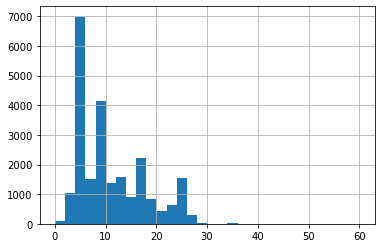

In [29]:
data['floors_total'].hist(bins=30)
print(data['floors_total'].isna().sum(), 'пропусков')

Судя по гистограмме и по другим данным в целом, мы не можем чётко сказать, на какую этажность можно заменить пропуски. К тому же они занимают небольшую часть от всей выборки, так что вряд ли сильно повлияют на исследование, поэтому оставим эти данные без изменений.

#### Проверим столбец 'rooms'

In [30]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

0 комнат в квартире звучит действительно странно, но что если это студии?

Студией называется квартира, в которой нет привычных внутренних перегородок, за исключением санузла, а разграничение по функциональным зонам носит условный характер. Это значит, что спальня, кухня и гостиная в такой квартире объединены в единое пространство. К слову, надо будет проверить площади кухонь у студий, в которых так же есть пропуски

In [31]:
data[data['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.65,24,15.50,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,2.65,14,17.00,1,False,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,2.65,17,24.75,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,2.65,26,24.30,19,False,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,2.65,10,NaN,7,False,True,False,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,2.65,25,18.00,16,False,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,2.65,24,18.00,4,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,2.65,19,NaN,8,False,True,False,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,2.65,9,18.00,8,False,False,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [32]:
data[(data['rooms'] == 0) & (data['studio'] == True)].shape[0]

138

In [33]:
data[(data['rooms'] == 0) & (data['is_apartment'] == True)].shape[0]

0

Из 198 случаев, где количество комнат равно нулю, 138 случаев логично объясняется - это квартиры-студии, в оставшихся 60 случаях причина отсутствия комнат неизвестна. Оставим пока без изменений.

#### Проверим столбец 'kitchen_area'

У кухонь могут быть пропуски в случаях, если это квартира-студия

In [34]:
data[data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19,1,2.65,9,NaN,2,False,False,False,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28,2,2.50,5,NaN,1,False,False,False,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18,1,2.65,22,NaN,3,False,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06,1,2.65,13,NaN,13,False,False,False,NaN,0.0,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08,1,2.56,18,19.6,10,False,False,False,NaN,0.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12,4,2.55,10,NaN,1,False,False,False,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08,1,2.80,9,NaN,2,False,False,False,NaN,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08,1,2.65,9,NaN,4,False,False,False,NaN,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [35]:
data[(data['kitchen_area'].isna()) & ((data['is_apartment'] == True) | (data['studio'] == True))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.65,24,15.50,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12,0,2.65,17,24.75,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
543,11,12790000.0,56.60,2018-11-06,2,3.50,3,29.40,1,True,False,False,NaN,0.0,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
608,2,1850000.0,25.00,2019-02-20,0,2.65,10,NaN,7,False,True,False,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25,17.50,21,False,True,False,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22877,2,4280000.0,28.00,2017-10-26,0,2.70,19,18.00,10,False,True,False,NaN,0.0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
22941,8,10965000.0,69.30,2019-01-10,1,3.00,4,48.90,4,True,False,False,NaN,2.0,Зеленогорск,73391.0,54490.0,3.0,4.0,1.0,217.0,110.0
23210,7,3200000.0,26.00,2017-09-01,0,2.65,25,18.00,16,False,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07,0,2.65,19,NaN,8,False,True,False,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


Из 2275 пропущенных значений площади кухни лишь 164 случая затрагивают студии и аппартаменты. С другой стороны, в обычных квартирах кухня так же может быть объединена с комнатами. В таком случае я бы нашёл отношение кухонной площади ко всей площади, а затем на этот коэффициент умножил бы всю площадь

In [36]:
ratio_kitchen = data['kitchen_area'].sum() / data['total_area'].sum()
ratio_kitchen

0.1583103172481819

Получается, как правило, 0.16 от всей площади квартиры составляет кухня. Окей, заменим пропуски (благо, пропусков в общей площади нет, и мы спокойно можем заменить всё целиком)

In [37]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * ratio_kitchen)

In [38]:
data['kitchen_area'].isna().sum()

0

Мы заменили пропуски в кухнях.

#### Проверим столбец 'living_area'

In [39]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [40]:
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,False,False,25.171340,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,False,False,False,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19,1,2.65,9,NaN,2,False,False,False,5.192578,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28,2,2.50,5,NaN,1,False,False,False,7.250613,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18,1,2.65,22,NaN,3,False,False,False,6.332413,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03,3,2.70,12,NaN,5,False,False,False,12.712318,0.0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12,4,2.55,10,NaN,1,False,False,False,13.931308,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08,1,2.80,9,NaN,2,False,False,False,7.218950,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08,1,2.65,9,NaN,4,False,False,False,5.540861,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


<AxesSubplot:>

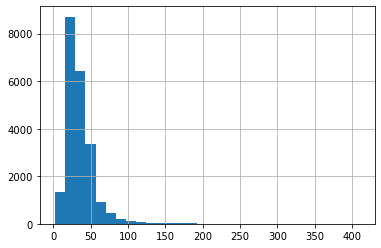

In [41]:
data['living_area'].hist(bins=30)

1903 пропуска в жилых площадях. А жилая площадь квартиры в 2 метра это сильно. Посмотрим, сколько у нас квартир с такими маленькими площадьми.

In [42]:
print(data[data['living_area'] < 5].shape[0])
data[data['living_area'] < 5].head()

4


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02,1,2.65,17,3.0,17,False,False,False,11.000000,0.0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6,2.0,2,False,False,False,9.000000,0.0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
21758,0,2330000.0,23.0,2018-01-01,0,2.65,24,2.0,22,False,True,False,3.641137,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8,3.0,8,False,False,False,16.000000,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


Странно, что, например, в квартире с общей площадью в 139 квадратных метров, всего 3 метра под жилую площадь... Заменим пропуски по тому же принципу, что и выше с кухнями.

In [43]:
data.loc[data['living_area'] < 5, 'living_area'] = None
data[data['living_area'] < 5] # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [44]:
ratio_living = data['living_area'].sum() / data['total_area'].sum()
ratio_living

0.5251237198856319

In [45]:
data['living_area'].nunique()

1780

Где-то половина от общей площади - жилая площадь. Заменим же пропуски

In [46]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * ratio_kitchen)
data['living_area'].nunique() # на всякий случай сравним количество уникальных площадей, мало ли оно всего на одну увеличится

2440

In [47]:
data['living_area'].isna().sum()

0

Теперь всё точно как надо.

#### Проверим столбец 'airports_nearest'

In [48]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [49]:
data['airports_nearest'].isna().sum()

5542

Странное значение расстояния до аэропорта в 0 метров. Да и максимальное тоже огромное.

In [50]:
data.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,False,False,False,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Стоит заменить этот ноль на NaN, поскольку текущее значение явно неверное

In [51]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = None
data.query('airports_nearest == 0') # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [52]:
data['airports_nearest'].describe()

count    18156.000000
mean     28795.258096
std      12629.420568
min       6450.000000
25%      18585.000000
50%      26726.000000
75%      37273.500000
max      84869.000000
Name: airports_nearest, dtype: float64

In [53]:
data[(data['airports_nearest'] == data['airports_nearest'].min()) | 
     (data['airports_nearest'] == data['airports_nearest'].max())] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4017,7,2268000.0,35.0,2017-12-21,1,2.65,9,14.0,6,False,False,False,8.0,0.0,Санкт-Петербург,6450.0,17461.0,0.0,NaN,1.0,444.0,25.0
9640,8,4200000.0,51.4,2014-12-10,2,2.55,5,31.0,2,False,False,False,6.0,1.0,посёлок Молодёжное,84869.0,65968.0,0.0,NaN,0.0,NaN,1194.0
12899,8,4199000.0,56.0,2017-12-21,2,2.65,9,27.0,5,False,False,False,15.0,0.0,Санкт-Петербург,6450.0,17461.0,0.0,NaN,1.0,444.0,24.0


Открыв карты, я лично убедился, что посёлок Молодёжное действительно так далеко расположен от аэропорта, так что здесь всё отлично :)

Заменить пропуски здесь не представляется возможным, разве что от середины населенного пункта, в котором расположена квартира и до аэропорта, но это тоже будет субъективная оценка - Санкт-Петербург очень большой, и  для него расстояние может сильно варьироваться.

#### Проверим и переименуем столбцы 'cityCenters_nearest', 'ponds_around3000', 'parks_around3000'

In [54]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 'ponds_around3000' : 'ponds_around', 'parks_around3000' : 'parks_around'}, inplace=True) # переименуем столбец
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,False,False,25.00000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60000,1,False,False,False,11.00000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30000,4,False,False,False,8.30000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,25.17134,9,False,False,False,25.17134,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,False,False,41.00000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [55]:
data[['city_centers_nearest', 'ponds_around', 'parks_around']].describe()

,city_centers_nearest,ponds_around,parks_around
count,18180.000000,18181.000000,18181.000000
mean,14191.277833,0.770255,0.611408
std,8608.386210,0.938346,0.802074
min,181.000000,0.000000,0.000000
25%,9238.000000,0.000000,0.000000
50%,13098.500000,1.000000,0.000000
75%,16293.000000,1.000000,1.000000
max,65968.000000,3.000000,3.000000


Мы переименовали столбцы, пропуски в 'ponds_around', 'parks_around' заменим на 0, т.к. в данной ситуации пропуск значения скорее всего отсутствие водоема, парка.

In [56]:
data['ponds_around'].fillna(0, inplace=True)
data['parks_around'].fillna(0, inplace=True)
print(data['ponds_around'].isna().sum())
print(data['parks_around'].isna().sum())

0
0


#### Проверим столбец 'parks_nearest'

In [57]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [58]:
data['parks_nearest'].isna().sum()

15620

In [59]:
data[(data['parks_nearest'].isna()) & (data['parks_around'] != 0) & (~data['parks_around'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition


Пропущено 3/4 значений. Видимо, проблема в выгрузке данных, потому что столбец parks_nearest заполнен (столбец parks_nearest отвечает за кол-во парков на расстоянии 3 км). Такое огромное количество данных было бы неправильно заменить на среднее, но и изменять расстояние на 0 тоже было бы неверным. Оставим неизменным.


#### Проверим столбец 'ponds_nearest'

In [60]:
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [61]:
data['ponds_nearest'].isna().sum()

14589

In [62]:
data[(data['ponds_nearest'].isna()) & (data['ponds_around'] != 0) & (~data['ponds_around'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition


Аналогичная ситуация с водоемами, оставим без изменений.

#### Проверим столбец 'days_exposition'

In [63]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [64]:
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,11.335019,22,False,False,False,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18,1,2.65,22,6.332413,3,False,False,False,6.332413,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02,2,2.65,9,30.300000,7,False,False,False,7.000000,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31,2,2.60,24,29.700000,9,False,False,False,8.300000,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26,71.400000,17,False,False,False,15.600000,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5,17.300000,5,False,False,False,5.600000,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.300000,3,False,False,False,13.830000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.700000,1,False,False,False,8.976195,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN


Скорее всего, пропущенные значения значат, что объявление не было снято с публикации. Оставим неизмененным этот столбец

#### Проверим столбец 'locality_name'

In [65]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [66]:
data['locality_name'].isna().sum()

49

In [67]:
data['locality_name'].duplicated().sum()

23334

Имеется большое количество неявных дубликатов, от которых нам нужно избавиться. Дубликаты могут возникать из-за разности в регистрах, разных написаний слов, а так же пояснений к виду населенного пункта. Можно перевести все населенные пункты в нижний регистр и отбросить всю часть слова до самого названия, но существуют населенные пункты с названием более чем из 1 слова, поэтому придётся отбрасывать виды, а не брать последнее слово из строки. 

Заменить пропуски не предоставляется возможным.

In [68]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name']

0            санкт-петербург
1             посёлок шушары
2            санкт-петербург
3            санкт-петербург
4            санкт-петербург
                ...         
23694        санкт-петербург
23695                  тосно
23696       село рождествено
23697        санкт-петербург
23698    поселок новый учхоз
Name: locality_name, Length: 23699, dtype: object

In [69]:
delete = ['поселок', 'посёлок', 'деревня', 'городского', 'городской', 'типа', 'садоводческое', 
          'некоммерческое', 'товарищество', 'коттеджный']

In [70]:
data['locality_name'] = data['locality_name'].fillna('неизвестно') # Необходимо для корректной работы

for el in delete:
    data.loc[data['locality_name'].str.contains(el), 'locality_name'] =\
    data[data['locality_name'].str.contains(el)]['locality_name'].str.replace(f'{el}.', '', regex=True)
data['locality_name']

0         санкт-петербург
1                  шушары
2         санкт-петербург
3         санкт-петербург
4         санкт-петербург
               ...       
23694     санкт-петербург
23695               тосно
23696    село рождествено
23697     санкт-петербург
23698         новый учхоз
Name: locality_name, Length: 23699, dtype: object

In [71]:
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'фёдоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'садовое новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'село путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'село павлово', 'оредеж', 'село копорье', 'молодёжное', 'тихвин',
       'победа', 'нурма', 'синявино', 'тосно', 'стр

Убрали все слова, означающие тип населенного пункта и привели все названия в нижний регистр

__Разобрались наконец-таки с предобработкой, можно двигаться дальше__

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

In [72]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,False,False,25.00000,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60000,1,False,False,False,11.00000,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30000,4,False,False,False,8.30000,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,25.17134,9,False,False,False,25.17134,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,False,False,41.00000,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


#### День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [73]:
data['day_of_week_exposition'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,day_of_week_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,False,False,25.00000,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60000,1,False,False,False,11.00000,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30000,4,False,False,False,8.30000,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,25.17134,9,False,False,False,25.17134,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,False,False,41.00000,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1


#### Месяц публикации объявления

In [74]:
data['month_of_exposition'] = data['first_day_exposition'].dt.month
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,day_of_week_exposition,month_of_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.300000,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,25.171340,9,False,False,False,25.171340,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.300000,3,False,False,False,13.830000,0.0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.845228,1,3
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.000000,4,False,False,False,8.500000,0.0,тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,52542.372881,0,1
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.700000,1,False,False,False,8.976195,0.0,село рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,44091.710758,6,2
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,12.150317,12,False,False,False,23.300000,2.0,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.400651,1,3


#### Год публикации объявления

In [75]:
data['year_of_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,day_of_week_exposition,month_of_exposition,year_of_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,False,False,25.00000,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60000,1,False,False,False,11.00000,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30000,4,False,False,False,8.30000,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,25.17134,9,False,False,False,25.17134,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,False,False,41.00000,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


#### Тип этажа квартиры (значения — «‎первый», «последний», «другой»);

In [76]:
def floor_category(floor_info):
    floors_total = floor_info['floors_total']
    floor = floor_info['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'

data['floor_type'] = data[['floors_total', 'floor']].apply(floor_category, axis=1)

In [77]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,day_of_week_exposition,month_of_exposition,year_of_exposition,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,False,False,25.00000,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60000,1,False,False,False,11.00000,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30000,4,False,False,False,8.30000,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,25.17134,9,False,False,False,25.17134,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,False,False,41.00000,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой


#### Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [78]:
data['center_distance_km'] = (data['city_centers_nearest'] / 1000).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,day_of_week_exposition,month_of_exposition,year_of_exposition,floor_type,center_distance_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,False,False,25.00000,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60000,1,False,False,False,11.00000,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30000,4,False,False,False,8.30000,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,25.17134,9,False,False,False,25.17134,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,False,False,41.00000,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


__Столбцы готовы, приступим к анализу__

### Проведите исследовательский анализ данных

#### Изучим общую площадь

In [79]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:xlabel='total_area'>

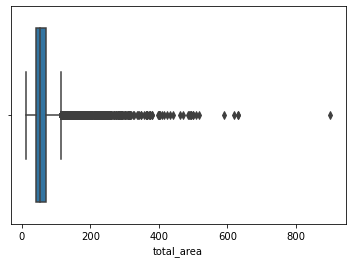

In [80]:
sns.boxplot(x=data['total_area'])

<AxesSubplot:>

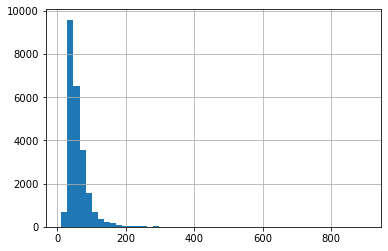

In [81]:
data['total_area'].hist(bins=50)

Много выбросов, отсечём лишние данные

<AxesSubplot:xlabel='total_area'>

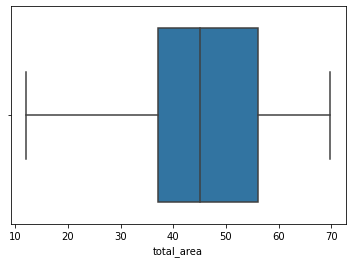

In [82]:
good_data_area = data.loc[data['total_area'] < 69.9, 'total_area']
sns.boxplot(x=good_data_area)

<AxesSubplot:>

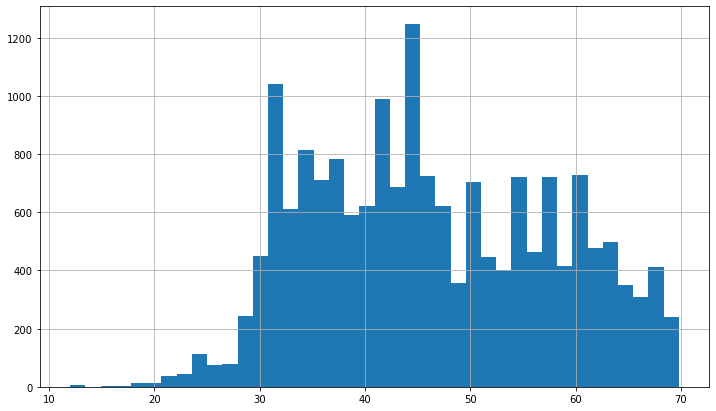

In [83]:
good_data_area.hist(figsize=(12, 7), bins=40)

In [84]:
good_data_area.describe()

count    17773.000000
mean        46.359540
std         11.438396
min         12.000000
25%         37.000000
50%         45.000000
75%         56.000000
max         69.800000
Name: total_area, dtype: float64

Среди квартир, включенных в выборку (мы убрали слишком большие квартиры по площади относительно большинства других квартир), средняя площадь составляет 46.35 кв. м.

Судя по гистограмме, большинство квартир по площади находятся в диапазоне 30-50 кв. м.

#### Изучим жилую площадь

In [85]:
data['living_area'].describe()

count    23699.000000
mean        32.497140
std         22.237019
min          2.058034
25%         18.000000
50%         29.000000
75%         41.195000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:xlabel='living_area'>

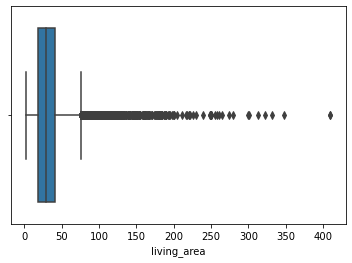

In [86]:
sns.boxplot(x=data['living_area'])

<AxesSubplot:>

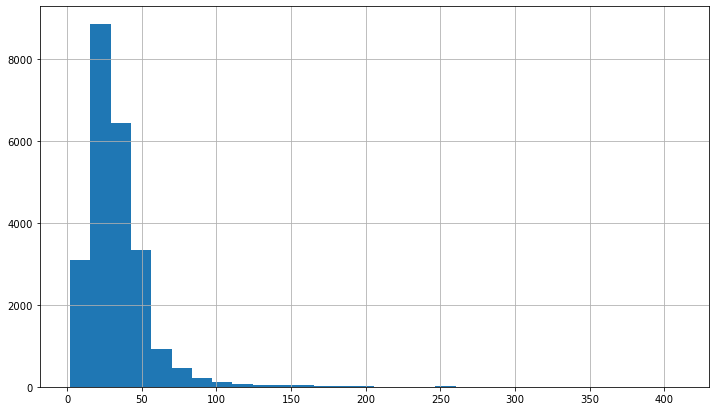

In [87]:
data['living_area'].hist(bins=30, figsize=(12, 7))

Отсеем выбросы

<AxesSubplot:xlabel='living_area'>

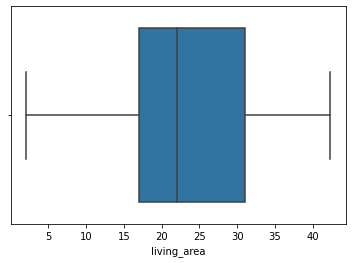

In [88]:
good_data_living = data.loc[data['living_area'] <= 42.3, 'living_area']
sns.boxplot(x=good_data_living)

<AxesSubplot:>

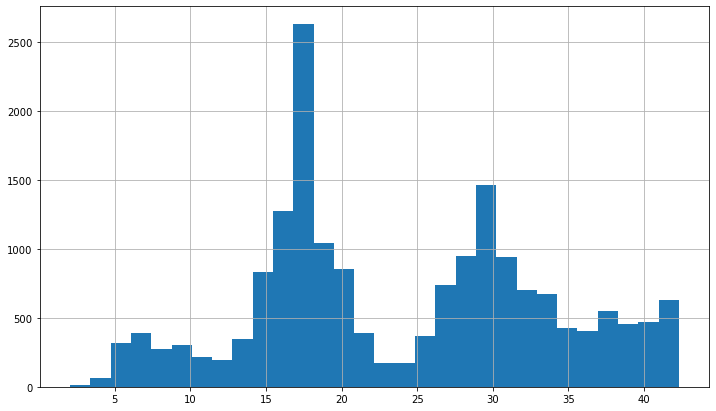

In [89]:
good_data_living.hist(bins=30, figsize=(12, 7))

In [90]:
print(good_data_living.median())
good_data_living.describe()

22.0


count    18245.000000
mean        23.990209
std          9.512365
min          2.058034
25%         17.000000
50%         22.000000
75%         31.000000
max         42.300000
Name: living_area, dtype: float64

По выборке без выбросов, средняя жилая площадь квартиры составляет 25.6 кв.м., однако больше всего квартир с жилой площадью в районе 15-20 и 27-32 кв. м. (в первом диапазоне квартир больше).

#### Изучим площадь кухонь

In [91]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.414734
std          5.980726
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:xlabel='kitchen_area'>

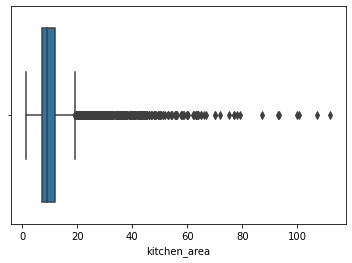

In [92]:
sns.boxplot(x=data['kitchen_area'])

<AxesSubplot:>

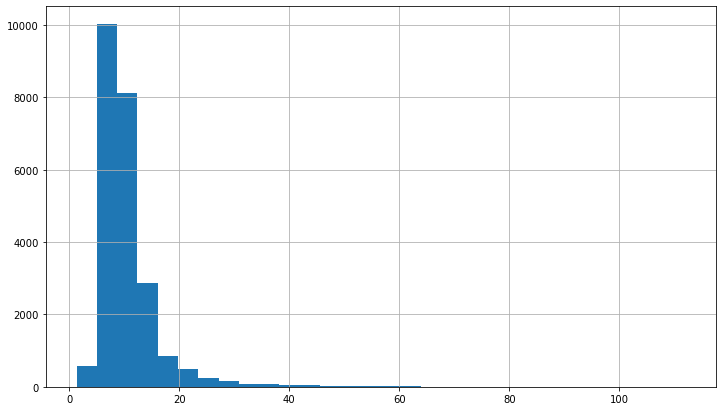

In [93]:
data['kitchen_area'].hist(bins=30, figsize=(12, 7))

Избавимся от выбросов

<AxesSubplot:xlabel='kitchen_area'>

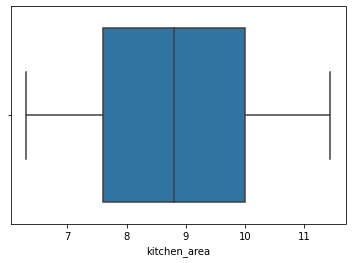

In [94]:
good_data_kitchen = data.loc[(6.3 <= data['kitchen_area']) & (data['kitchen_area'] <= 11.44), 'kitchen_area']
sns.boxplot(x=good_data_kitchen)

<AxesSubplot:>

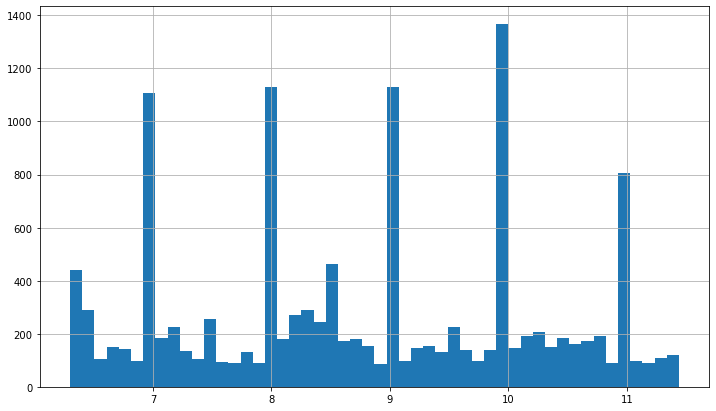

In [95]:
good_data_kitchen.hist(bins=50, figsize=(12, 7))

In [96]:
good_data_kitchen.describe()

count    13144.000000
mean         8.780189
std          1.425836
min          6.300000
25%          7.600000
50%          8.793111
75%         10.000000
max         11.440000
Name: kitchen_area, dtype: float64

По гистограмме видно большое количество целочисленных значений площадей. Возможно, имело смысл разбить кухни по площадям на группы 7-8 кв.м., 8-9 кв.м. и так далее. Средняя площадь при этом равна 8.81, а больше всего кухонь площадью 10 кв.м..

#### Изучим цену объектов

In [97]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:xlabel='last_price'>

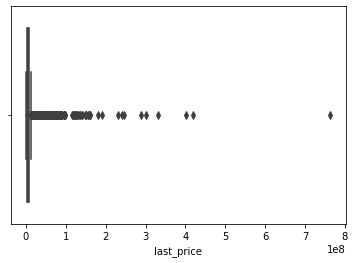

In [98]:
sns.boxplot(x=data['last_price'])

<AxesSubplot:>

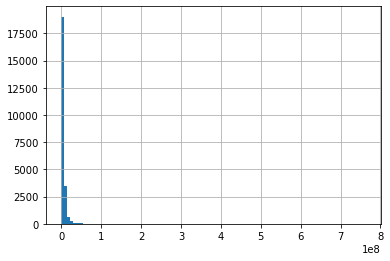

In [99]:
data['last_price'].hist(bins=100)

Нужно избавиться от выбросов

<AxesSubplot:xlabel='last_price'>

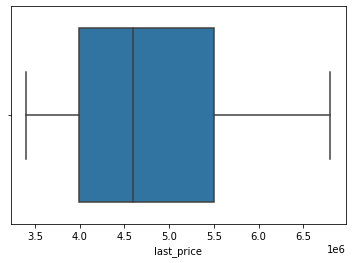

In [100]:
good_data_price = data.loc[(3.400000e+06 <= data['last_price']) & (data['last_price'] <= 6.800000e+06), 'last_price']
sns.boxplot(x=good_data_price)

<AxesSubplot:>

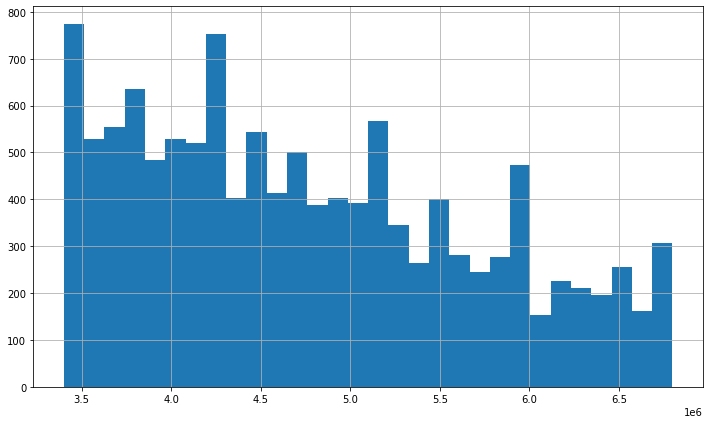

In [101]:
good_data_price.hist(bins=30, figsize=(12, 7))

In [102]:
good_data_price.describe()

count    1.218300e+04
mean     4.771908e+06
std      9.378577e+05
min      3.400000e+06
25%      3.990000e+06
50%      4.600000e+06
75%      5.500000e+06
max      6.800000e+06
Name: last_price, dtype: float64

При избавлении от выбросов средняя цена квартиры составляет 4.77 млн. рублей. При этом по гистограмме можно сказать, что в общем случае чем больше цена квартиры, тем меньше объявлений по такой цене.

#### Исследуем количество комнат

In [103]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

<AxesSubplot:>

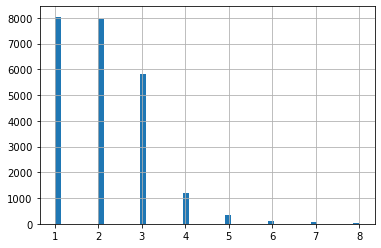

In [104]:
data['rooms'].hist(bins=50, range=(1, 8))

Большинство рзамещаемых квартир имеют 1-2 комнаты, меньше - 3, и намного меньше квартир с 4 и более комнатами.

#### Исследуем высоту потолков

In [105]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.698417
std          0.236192
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:xlabel='ceiling_height'>

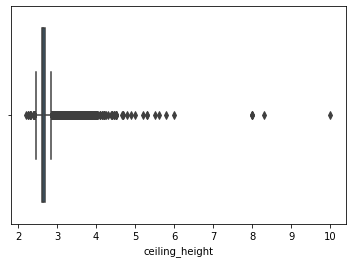

In [106]:
sns.boxplot(x=data['ceiling_height'])

<AxesSubplot:>

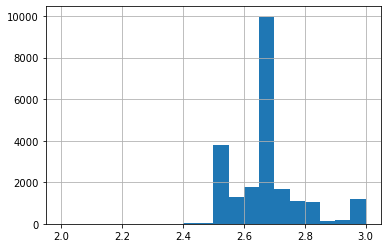

In [107]:
data['ceiling_height'].hist(bins=20, range=(2, 3))

С высотой потолков мы уже боролись выше и убирали выбросы.

Средняя высота потолков составляет 2.69, собственно, по гистограмме видно, что большинство высот потолков в квартирах находятся в диапазоне 2.6-2.7 м

#### Изучим этаж квартир

In [108]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:xlabel='floor'>

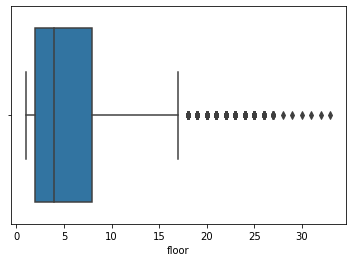

In [109]:
sns.boxplot(x=data['floor'])

<AxesSubplot:>

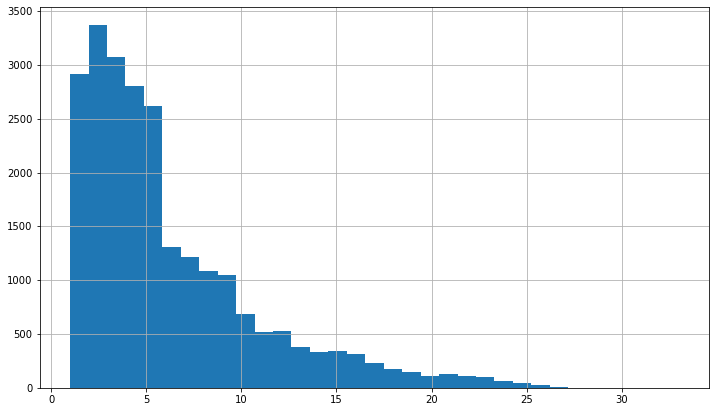

In [110]:
data['floor'].hist(bins=33, figsize=(12, 7))

По гистограмме видно, что в большинстве объявлений фигурируют квартиры 5 этажа и ниже. Возможно, большинство квартир расположено в малоэтажных домах. Этажность домов мы исследуем позднее.

#### Исследуем тип этажа квартиры («первый», «последний», «другой»)

In [111]:
data.groupby('floor_type')['floor_type'].count()

floor_type
другой       17446
первый        2917
последний     3336
Name: floor_type, dtype: int64

<AxesSubplot:>

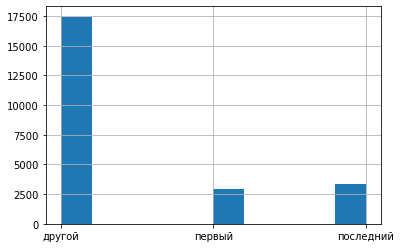

In [112]:
data['floor_type'].hist()

По гистограмме можно сделать вывод, что квартир на первом этаже меньше, чем на последнем. Логично, что квартир на остальных этажах намного больше.

#### Изучим общее количество этажей в доме

In [113]:
data['floors_total'].describe()

count    23699.000000
mean        10.635090
std          6.616396
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

#### Квартира на 60 этаже... В Лахта-центре есть квартиры?


<AxesSubplot:xlabel='floors_total'>

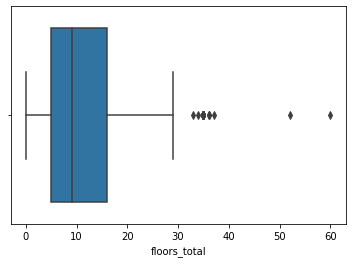

In [114]:
sns.boxplot(x=data['floors_total'])

<AxesSubplot:>

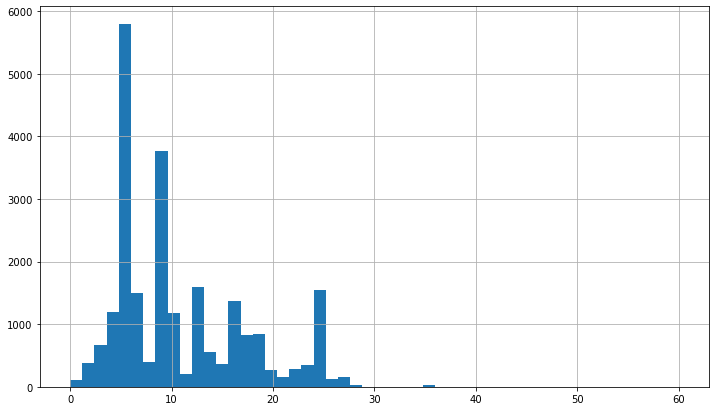

In [115]:
data['floors_total'].hist(bins=50, figsize=(12, 7))

Думаю, слишком высокие квартиры лучше отсечь

<AxesSubplot:xlabel='floors_total'>

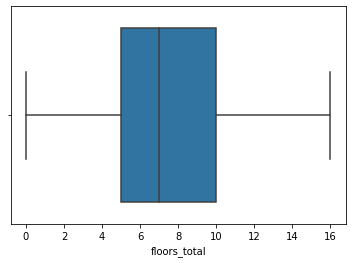

In [116]:
good_data_floors = data.loc[data['floors_total'] <= 16, 'floors_total']
sns.boxplot(x=good_data_floors)

<AxesSubplot:>

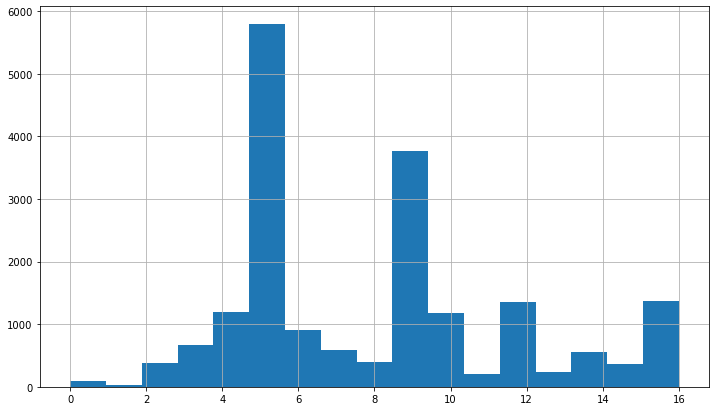

In [117]:
good_data_floors.hist(bins=17, figsize=(12,7))

In [118]:
good_data_floors.describe()

count    19069.00000
mean         7.95317
std          3.80711
min          0.00000
25%          5.00000
50%          7.00000
75%         10.00000
max         16.00000
Name: floors_total, dtype: float64

In [119]:
good_data_floors.value_counts().sort_values()

1       25
0       86
11     203
13     229
15     365
2      383
8      390
14     553
7      592
3      668
6      914
10    1174
4     1200
12    1362
16    1376
9     3761
5     5788
Name: floors_total, dtype: int64

Большинство квартир в объявлениях составляют 9-ти и 5-ти этажки, реже 12-ти, 4-ех и 10-ти этажные дома. В среднем этажность дома составляет 8 этажей.

#### Изучим расстояние до центра города в метрах

In [120]:
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:xlabel='city_centers_nearest'>

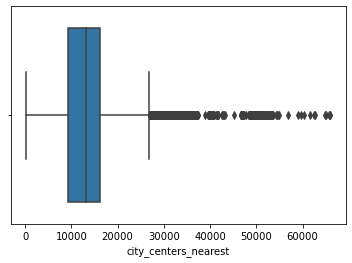

In [121]:
sns.boxplot(x=data['city_centers_nearest'])

<AxesSubplot:>

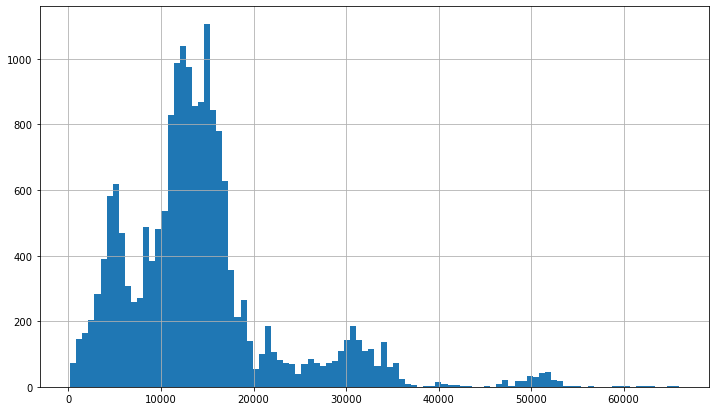

In [122]:
data['city_centers_nearest'].hist(bins=100, figsize=(12, 7))

Есть квартиры, расположенные на огромном расстоянии до центра города. Но мы рассмотрим значения между 1 и 3 квартилем в выборке.

<AxesSubplot:xlabel='city_centers_nearest'>

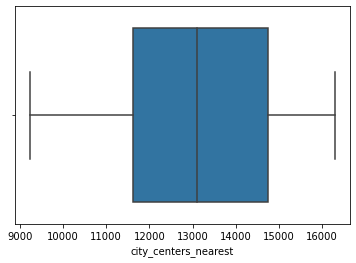

In [123]:
good_data_city = data.loc[(9238 <= data['city_centers_nearest']) & (data['city_centers_nearest'] <= 16293), 'city_centers_nearest']
sns.boxplot(x=good_data_city)

<AxesSubplot:>

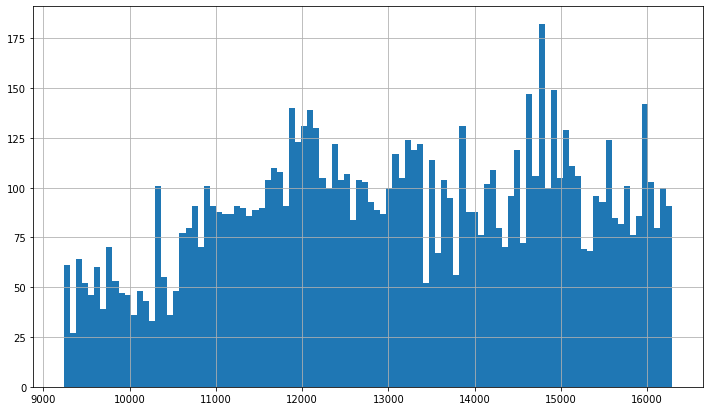

In [124]:
good_data_city.hist(bins=100, figsize=(12, 7))

In [125]:
good_data_city.describe()

count     9094.000000
mean     13081.622828
std       1885.667283
min       9238.000000
25%      11626.250000
50%      13100.000000
75%      14746.500000
max      16293.000000
Name: city_centers_nearest, dtype: float64

Все квартиры расположенны на разном расстоянии, средним в выборке после удаления выбросов является 13 километров.

#### Изучим расстояние до ближайшего аэропорта

In [126]:
data['airports_nearest'].describe()

count    18156.000000
mean     28795.258096
std      12629.420568
min       6450.000000
25%      18585.000000
50%      26726.000000
75%      37273.500000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:xlabel='airports_nearest'>

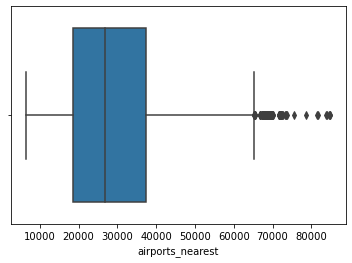

In [127]:
sns.boxplot(x=data['airports_nearest'])

<AxesSubplot:>

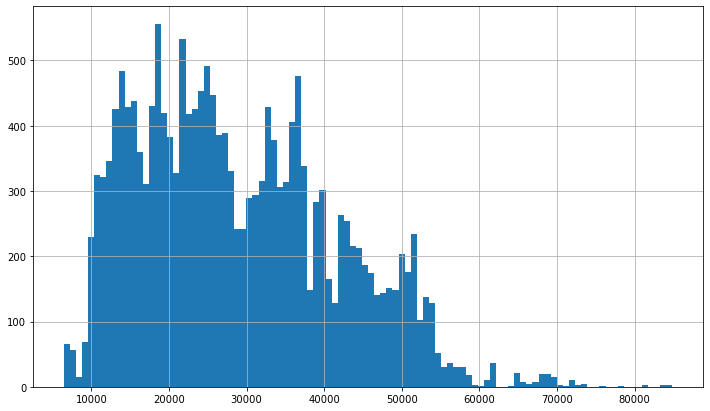

In [128]:
data['airports_nearest'].hist(bins=100, figsize=(12, 7))

В предобработке уже успел усомниться в квартире на расстоянии 85 км от аэропорта :)

Удалим выбросы

<AxesSubplot:xlabel='airports_nearest'>

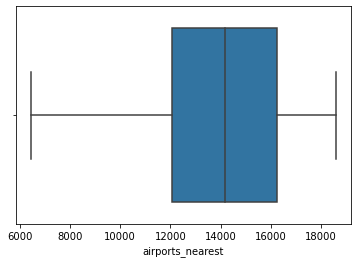

In [129]:
good_data_air = data.loc[(data['airports_nearest'] <= 37273.5) & (data['airports_nearest'] <= 18585.000000), 'airports_nearest']
sns.boxplot(x=good_data_air)

<AxesSubplot:>

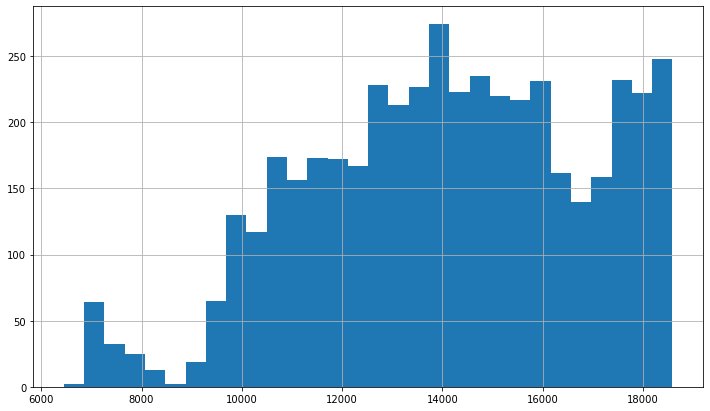

In [130]:
good_data_air.hist(bins=30, figsize=(12, 7))

In [131]:
good_data_air.describe()

count     4542.000000
mean     14094.729855
std       2748.110323
min       6450.000000
25%      12051.500000
50%      14184.000000
75%      16243.000000
max      18585.000000
Name: airports_nearest, dtype: float64

Большая часть городов из нашей выборки расположена на расстоянии более чем 10 км от аэропорта, при этом среднее расстояние - 14 км.

#### Изучим расстояния до ближайшего парка

In [132]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:xlabel='parks_nearest'>

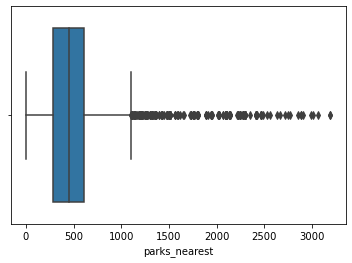

In [133]:
sns.boxplot(x=data['parks_nearest'])

<AxesSubplot:>

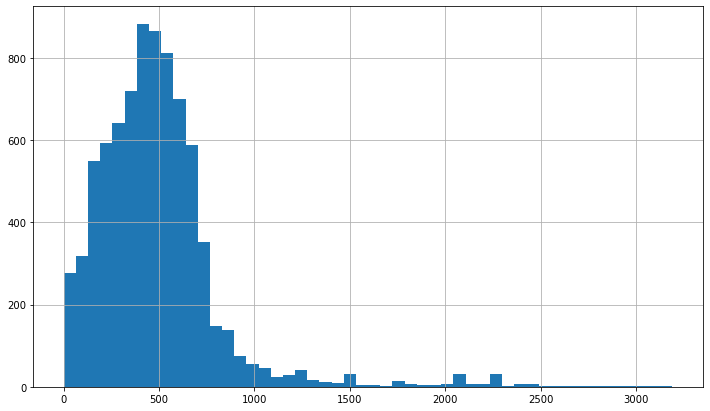

In [134]:
data['parks_nearest'].hist(bins=50, figsize=(12, 7))

Несмотря на то, что бОльшая часть данных отсутствует, нужно проанализировать то, что есть. Уберём выбросы.

<AxesSubplot:xlabel='parks_nearest'>

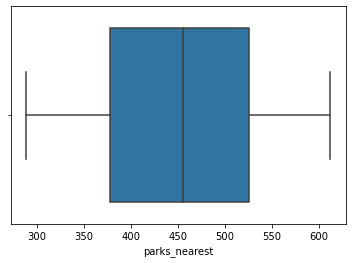

In [135]:
good_data_parks = data.loc[(288 <= data['parks_nearest']) & (data['parks_nearest'] <= 612), 'parks_nearest']
sns.boxplot(x=good_data_parks)

<AxesSubplot:>

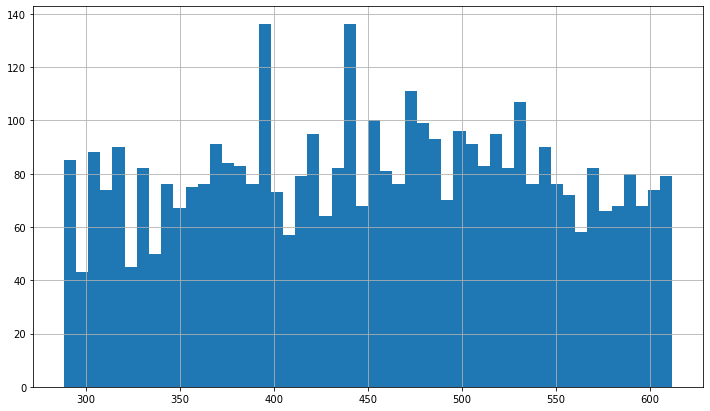

In [136]:
good_data_parks.hist(bins=50, figsize=(12, 7))

In [137]:
good_data_parks.describe()

count    4048.000000
mean      451.675148
std        90.013669
min       288.000000
25%       377.750000
50%       455.000000
75%       526.000000
max       612.000000
Name: parks_nearest, dtype: float64

Из тех данных, что мы имеем, среднее расстояние от дома до парка - 450 метров.

#### Исследуем день и месяц публикации объявления

In [138]:
data['day_of_week_exposition'].value_counts()

3    4295
1    4183
4    4000
2    3974
0    3612
5    1936
6    1699
Name: day_of_week_exposition, dtype: int64

<AxesSubplot:>

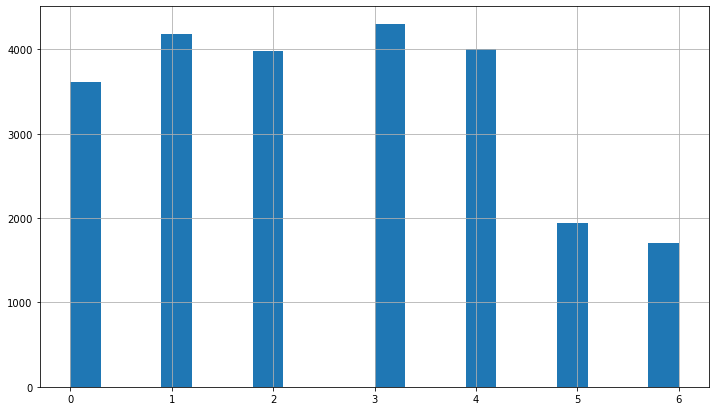

In [139]:
data['day_of_week_exposition'].hist(bins=20, figsize=(12, 7))

На выходных люди размещают меньше объявлений. А что там с месяцами?

In [140]:
data['month_of_exposition'].value_counts()

2     2640
3     2587
4     2379
11    2371
10    2127
9     1981
6     1760
8     1744
7     1695
12    1641
1     1500
5     1274
Name: month_of_exposition, dtype: int64

<AxesSubplot:>

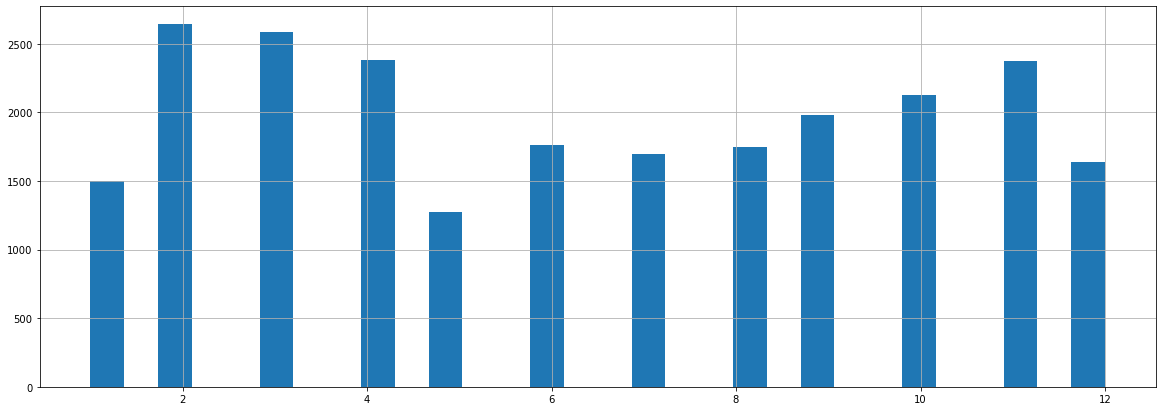

In [141]:
data['month_of_exposition'].hist(bins=30, figsize=(20, 7))

Больше всего объявлений размещается с февраля по май, в мае спад, с июня по ноябрь количество объявлений растёт, а в декабре и январе опять падает. Может быть, это объясняется большим количеством праздников: в декабре-январе все готовятся и празднуют Новый год, а в мае отдыхают первые две недели?

__Мы закончили отдельное изучение параметров объектов__

#### Теперь изучим, как быстро продавались квартиры

In [142]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:xlabel='days_exposition'>

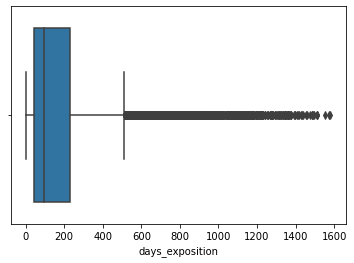

In [143]:
sns.boxplot(x=data['days_exposition'])

<AxesSubplot:>

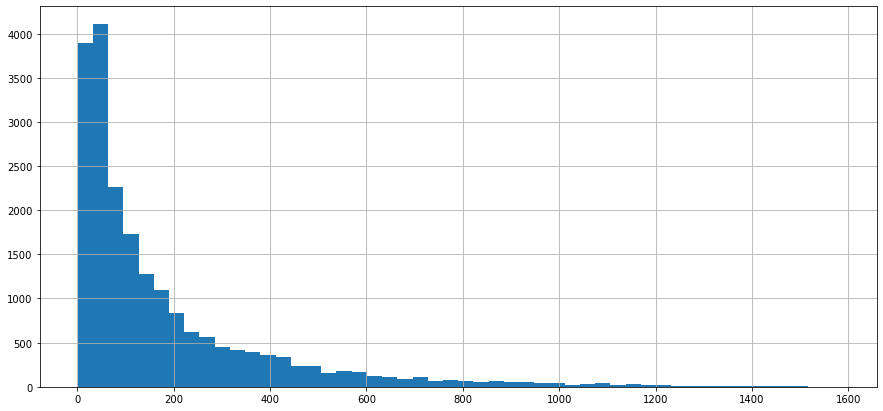

In [144]:
data['days_exposition'].hist(bins=50, figsize=(15, 7))

In [145]:
print('Медиана:', data['days_exposition'].median())
print('Среднее:', data['days_exposition'].mean())

Медиана: 95.0
Среднее: 180.88863436982163


Распределение экспоненциальное. Среднее почти в два раза больше медианы из-за достаточно долгих объявлений: кто-то продавал квартиру 1580 дней. Как правило, большинство квартир продаются менее чем за полгода. __Думаю, что быстрой продажей можно считать срок менее 45 дней (<Q1), а необычно долгой - более 232 дней (>Q3).__

<AxesSubplot:>

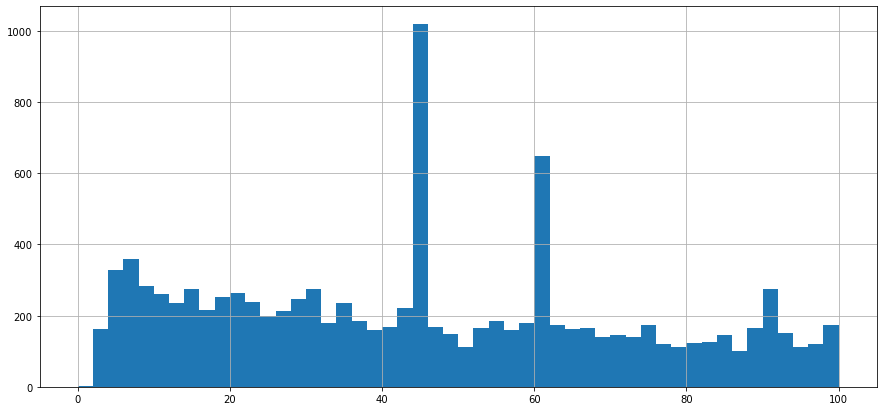

In [146]:
data['days_exposition'].hist(bins=50, figsize=(15, 7), range=(0, 100))

In [147]:
data.query('0 < days_exposition < 100')['days_exposition'].value_counts().head(10)

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64

Интересные два пика: чаще всего объявления висят 45 и 60 дней, далее ровно неделю, затем 30 и 90 дней. Возможно, объявления автоматически удаляются с сайта после продажи квартиры каждые 15 дней, если владелец не сделал это вручную или не подтвердил, что объявление всё ещё актуально?

#### Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта

<AxesSubplot:>

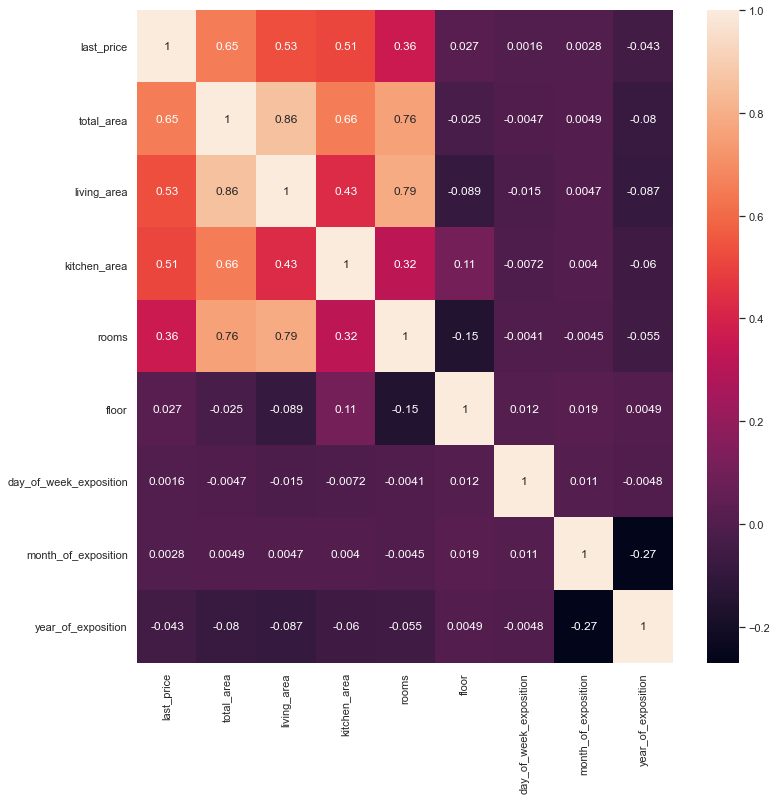

In [148]:
sns.set(rc={'figure.figsize':(12, 12)})

sns.heatmap(data[['last_price', 'total_area', 'living_area', 
                  'kitchen_area', 'rooms', 'floor', 
                  'day_of_week_exposition', 'month_of_exposition', 
                  'year_of_exposition']].corr(), annot = True)

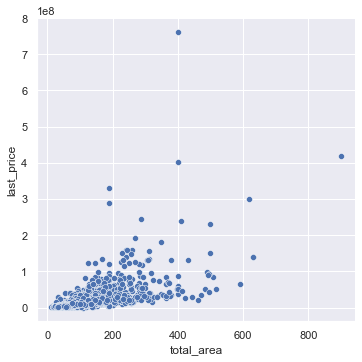

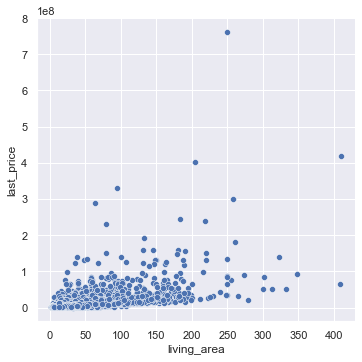

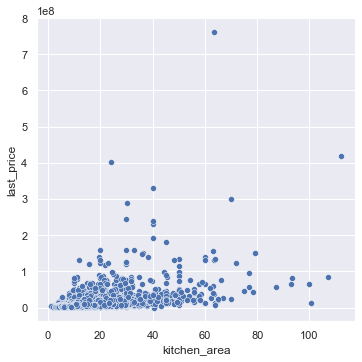

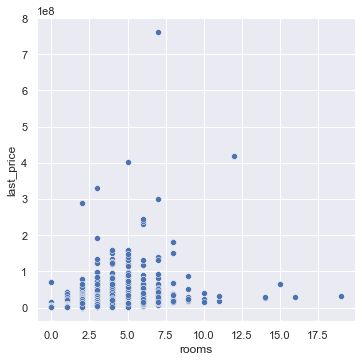

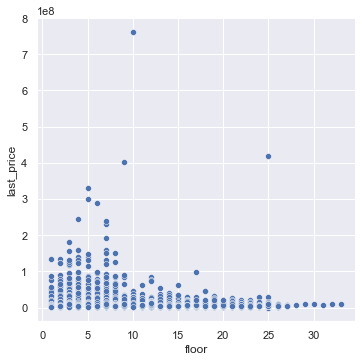

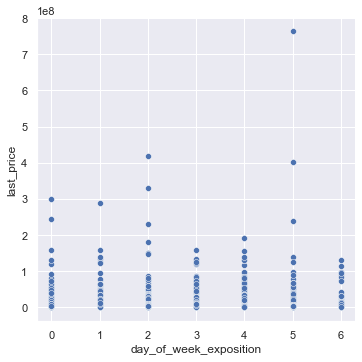

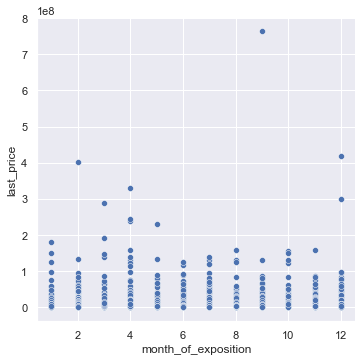

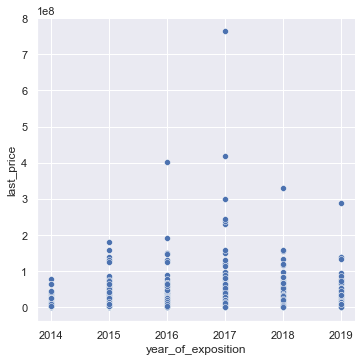

In [149]:
sns.set(rc={'figure.figsize':(5, 5)})
for col in ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', 
            'day_of_week_exposition', 'month_of_exposition', 'year_of_exposition']:
    sns.relplot(x=data[col], y=data['last_price'])

На графиках мы видим, что наибольшее влияние на цену квартиры оказывают общая и жилая площадь, менее значительное влияние оказывают площадь кухни и количество комнат в квартире.

#### Найдём среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Выделим эти населенные пункты

In [150]:
data['locality_name'].value_counts().head(10)

санкт-петербург    15721
мурино               590
кудрово              472
шушары               440
всеволожск           398
пушкин               369
колпино              338
парголово            327
гатчина              307
выборг               237
Name: locality_name, dtype: int64

In [151]:
c = ['санкт-петербург','мурино','кудрово','шушары','всеволожск','пушкин','колпино','парголово','гатчина','выборг']
df = data.loc[data['locality_name'].isin(c)]
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,day_of_week_exposition,month_of_exposition,year_of_exposition,floor_type,center_distance_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,False,False,25.00000,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60000,1,False,False,False,11.00000,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30000,4,False,False,False,8.30000,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,25.17134,9,False,False,False,25.17134,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,False,False,41.00000,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


In [152]:
df.pivot_table(index='locality_name', values='price_per_square_meter')\
.sort_values('price_per_square_meter', ascending=False)

,price_per_square_meter
locality_name,
санкт-петербург,114849.008794
пушкин,103125.819291
кудрово,95324.930544
парголово,90175.913458
мурино,86087.512050
шушары,78677.364217
колпино,75424.579098
гатчина,68746.146763
всеволожск,68654.473986


Ожидаемо, самая дорогая цена среди самых популярных населенных пунктов в Санкт-Петербурге, а самая низкая - в Выборге.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно)

#### Выделим квартиры в Санкт-Петербурге, вычислим среднюю цену каждого километра.

In [153]:
spb = data[data['locality_name'] == 'санкт-петербург']
spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,day_of_week_exposition,month_of_exposition,year_of_exposition,floor_type,center_distance_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.00000,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.30000,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,25.171340,9,False,False,False,25.17134,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.00000,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,11.335019,22,False,False,False,18.90000,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,12.0


In [154]:
mean_spb = spb['last_price'].sum() / spb['center_distance_km'].sum()
print(f'Средняя цена для каждого километра: {mean_spb.round()} рублей')

Средняя цена для каждого километра: 697989.0 рублей


<AxesSubplot:xlabel='center_distance_km'>

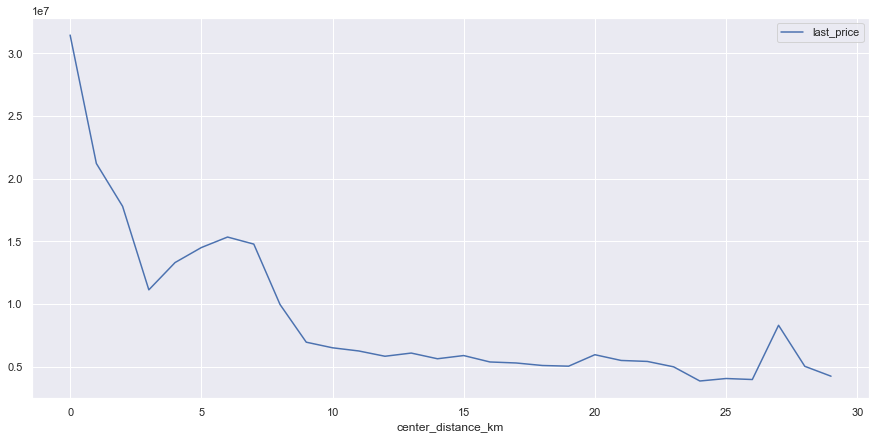

In [155]:
spb.pivot_table(index='center_distance_km', values='last_price').plot(figsize=(15,7))

По графику видно, что наиболее близкие к центру квартиры имеют наибольшую цену, падение цены на графике резко изменилось около расстояния в 10 км. По этим причинам можно сделать вывод, что к квартирам, находящимся в центре, можно относить квартиры в радиусе менее 10 км от центра Санкт-Петербурга.

## Общий вывод

Подводя итог проекту по исследованию объявлений о продаже квартир, мы столкнулись с большим количеством работы, связанной с предобработкой данных. Во многих столбцах были пропущенные значения, часть из которых, к сожалению, невозможно заменить, если не обратиться к людям, отвечающих за сбор и формировку этих данных. Кроме этого, мы столкнулись с аномальными, редкими и выбивающимися значениями в количественных переменных, часть из которых удалось устранить, но природа некоторых аномалий осталась неизвестной. Напоследок, мы столкнулись с неявными дубликатами, которые удалось исправаить.

После завершения самого сложного этапа предобработки мы приступили к объявлению необходимых для анализа новых столбцов: цена кв. метра, день недели публикации, месяц публикации, год публикации, тип этажа и расстояние до центра города в километрах.

Далее мы приступили непосредственно к исследованию: были подробно проанализированны параметры объектов (общая площадь, этаж квартиры, общая этажность дома, расстояние до аэропорта и т. д.). Помимо этого была изучена скорость продажи квартир с помощью сервиса, найдено среднее и медианное время, установлены рамки, относительно которых можно судить о том, что квартира была продана медленно или быстро. Также, при помощи корреляций были изучены зависимости стоимости квартиры от её параметров, построены графики. Были найдены самые популярные населенные пункты, в которых чаще всего продают квартиры, для таких пунктов были найдены средние цены квадратного метра. А для Санкт-Петербурга было найдено, как меняется цена квартиры в зависимости от удалённости от центра города

Обобщая, чаще всего на Яндекс.Недвижимости в Лен. Области выставляют 1-2 комнатные квартиры в 9-и и 5-ти этажных домах с высотой потолков в районе 2.7 метров и средней общей площадью 46.35. Среди самых популярных (топ-10) городов в сервисе самая дешевая цена за квадратный метр - в Выборге, всего 58.1 тыс. рублей, самая дорогая - в Санкт-Петербурге, здесь стоимость составляет 115 тыс. рублей за квадратный метр, при этом в Санкт-Петербурге намного больше объявлений (самый популярный город). Наиболее близкие к центру в Санкт-Петербурге квартиры имеют наибольшую цену, а к квартирам в центре можно отнести квартиры в радиусе 10 км от центра города. Наибольшее влияние на стоимость квартир, ожидаемо, оказывают общая и жилая площадь.